In [1]:
!kaggle datasets list

ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
saidaminsaidaxmadov/chocolate-sales                             Chocolate Sales                                         468320  2026-01-04 14:23:35                 12274        201  1.0              
sonalshinde123/work-from-home-employee-burnout-dataset          Work From Home Employee Burnout Dataset                  27962  2026-01-31 03:28:22.227000            751         30  1.0              
jayjoshi37/customer-subscription-churn-and-usage-patterns       Customer Subscription Churn and Usage Patterns           34246  2026-01-27 13:53:52.857000            807         23  1.0              


In [2]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import tensorflow as tf
import matplotlib.pyplot as pyplot
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Load data
train_data = train_datagen.flow_from_directory(
    r'C:\Users\Ashish yadav\100DL\11.dog vs cat on pretrained model\train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

test_data = test_datagen.flow_from_directory(
    r'C:\Users\Ashish yadav\100DL\11.dog vs cat on pretrained model\test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [6]:
#load vgg16 pretrained model
base_model = VGG16(
    weights = "imagenet",
    include_top = False,
    input_shape = (224,224,3)
)


In [7]:
#we dont want to train vgg16 model---isliye starting layer  ki training block krdi
for layer in base_model.layers:
    layer.trainable = False


In [8]:
# hamara model banate hai
model = Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [9]:
#compile model

model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)


In [10]:
# train a model ---hamare wala

history = model.fit(
    train_data,
    validation_data = test_data,
    epochs = 5
)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1234s 2s/step - accuracy: 0.8633 - loss: 0.3095 - val_accuracy: 0.9222 - val_loss: 0.1827
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1243s 2s/step - accuracy: 0.9008 - loss: 0.2309 - val_accuracy: 0.9332 - val_loss: 0.1630
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1225s 2s/step - accuracy: 0.9100 - loss: 0.2130 - val_accuracy: 0.9234 - val_loss: 0.1785
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1227s 2s/step - accuracy: 0.9155 - loss: 0.2005 - val_accuracy: 0.9366 - val_loss: 0.1483
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1232s 2s/step - accuracy: 0.9208 - loss: 0.1899 - val_accuracy: 0.9322 - val_loss: 0.1587


In [12]:
#save model

model.save("cat_dog_vgg16.h5")


In [14]:
import matplotlib.pyplot as plt

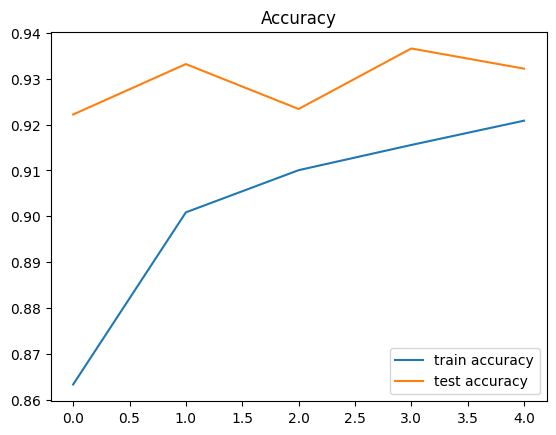

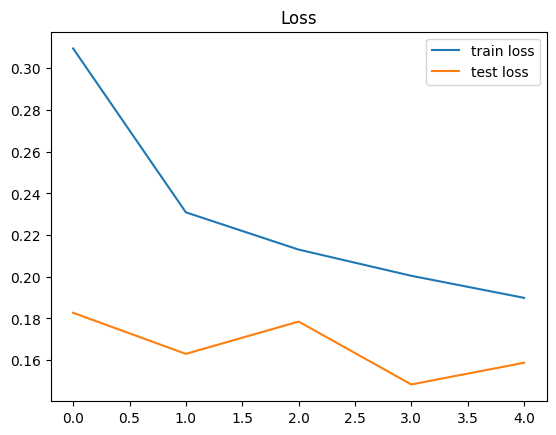

In [15]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.title("Loss")
plt.show()


In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\Ashish yadav\100DL\11.dog vs cat on pretrained model\test\cats\cat.6670.jpg", target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255

prediction = model.predict(img)

if prediction[0][0] > 0.5:
    print("Dog 🐶")
else:
    print("Cat 🐱")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Cat 🐱


In [30]:
import os
print(os.getcwd())


C:\Users\Ashish yadav\100DL\11.dog vs cat on pretrained model
